# **<center>PCA - Assignment</center>**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Instaling & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)<br>
  - **3.2** [**Upgrading Libraries**](#Section32)<br>
  - **3.2** [**Importing Libraries**](#Section33)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Processing**](#Section6)<br>
  - **5.1** [**Data Pre-Profiling**](#Section51)<br>
  - **5.2** [**Data Cleaning**](#Section52)<br>
  - **5.3** [**Data Post-Profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Feature Scaling**](#Section71)
  - **7.2** [**Data Splitting**](#Section72)

**8.** [**Modelling Development & Evaluation without PCA**](#Section8)<br>
  - **8.1** [**Modelling, Prediction & Evaluation without PCA**](#Section81)<br>
  - **8.2** [**Dimensionality Reduction using PCA**](#Section82)<br>
  - **8.3** [**Modelling, Prediction & Evaluation with PCA**](#Section83)<br>

**9.** [**Conclusion**](#section9)

---
<a name = Section1></a>
# **1. Introduction**
---

- **Principal Component Analysis** helps with **dimensionality reduction** of **highly dimensional** datasets.

- It is one of the most popular **linear dimension reduction** algorithms.

- It is a **projection based method** that transforms the data by **projecting** it onto a **set of orthogonal** (perpendicular) **axes**.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- The need for **identifying breast cancer** in it's early stages has been increasing.

- The **Wisconsin Diagnostic Laboratories** have a good record of diagnosing patients with cancer in their early stages.

- But it is a time critical process to **generate**, **analyze** and **predict** if a particular **nucleus** can be **malignant or benign**.

<center><img src="https://camo.githubusercontent.com/9f6c40f3ca523734a3b32aa166bbbc4527cc09df57113b3fb90b8768f1844d60/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f323630302f312a674e6346454c3163704770444334766f317a554157412e706e67" width=70%></center>

- They have hired you to help them **develop a predictor** that can predict if a **nucleus** can be **harmful** or not.

- They have provided you with **dimensions** and other **concerned feautres** of the nucleus of **past patients** along with their results.

- The **objective** is to **classify** if a patient can **potentially** suffer from **breast cancer or not**.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---





<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q ydata-profiling                                     # Library to generate basic statistics about data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 42.7 MB/s eta 0:00:00


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
!pip install -q --upgrade ydata-profiling
!pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                           # Importing Ydata Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To import a standard scaler for scaling the features
from sklearn.model_selection import train_test_split                # To split the data into train and test datasets
from sklearn.ensemble import RandomForestClassifier                 # To instantiate a random forest classifier
from sklearn.linear_model import LogisticRegression                 # To instantiate a logistic regression classifier
from sklearn.metrics import accuracy_score                          # To calculate the accuracy score of the classifiers
from sklearn.decomposition import PCA                               # To instantiate Principal Component Analysis
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The features in the dataset are computed from a **digitized image** of a **fine needle aspirate** (FNA) of a breast mass.
- They describe **characteristics** of the **cell nuclei** present in the image.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 569 | 33 | 122 KB|

- The dataset has **ten real-valued features** that are computed for each **cell nucleus**:

  - a) **radius** (mean of distances from center to points on the perimeter)
  - b) **texture** (standard deviation of gray-scale values)
  - c) **perimeter**
  - d) **area**
  - e) **smoothness** (local variation in radius lengths)
  - f) **compactness** (perimeter^2 / area - 1.0)
  - g) **concavity** (severity of concave portions of the contour)
  - h) **concave points** (number of concave portions of the contour)
  - i) **symmetry**
  - j) **fractal dimension** ("coastline approximation" - 1)

- The **mean**, **standard error** and "**worst**" or **largest** (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

- For instance, **field 3 is Mean Radius**, **field 13 is Radius SE**, **field 23 is Worst Radius**.

| Id | Feature | Description |
| :-- | :--| :--|
|01|id|ID number|
|02|diagnosis|Diagnosis (M = malignant, B = benign)|
|03|radius_mean|Mean radius|
|04|texture_mean|Mean texture|
|05|perimeter_mean|Mean perimeter|
|06|area_mean|Mean Area|
|07|smoothness_mean|Mean Smoothness|
|08|compactness_mean|Mean Compactness|
|09|concavity_mean|Mean Concavity|
|10|concave_points_mean|Mean number of concave portions|
|11|symmetry_mean|Mean Symmetry|
|12|fractal_dimension_mean|Mean Fractal Dimension|
|13|radius_se|Standard Error of Radius|
|14|texture_se|Standard Error of texture|
|15|perimeter_se|Standard Error of Perimeter|
|16|area_se|Standard Error of Area|
|17|smoothness_se|Standard Error of Smoothness|
|18|compactness_se|Standard Error of Compactness|
|19|concavity_se|Standard Error of Concavity|
|20|concave_points_se|Standard Error of number of concave portions|
|21|symmetry_se|Standard Error of Symmetry|
|22|fractal_dimension_se|Standard Error of Fractal dimension|
|23|radius_worst|Worst/Largest radius measured|
|24|texture_worst|Worst/Largest texture measured|
|25|perimeter_worst|Worst/Largest perimeter measured|
|26|area_worst|Worst/Largest area measured|
|27|smoothness_worst|Worst/Largest smoothness measured|
|28|compactness_worst|Worst/Largest compactness measured|
|29|concavity_worst|Worst/Largest concavity measured|
|30|concave_points_worst|Highest no. of concave portions measured|
|31|symmetry_worst|Worst/Largest symmetry measured|
|32|fractal_dimension_worst|Worst/Largest Fractal dimension measured|
|33|Unnamed: 32|Unknown|


In [4]:
cancer = pd.read_csv(filepath_or_buffer="cancer.csv")
print('Shape of the dataset:', cancer.shape)
cancer.head()

Shape of the dataset: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99000,10.38000,122.80000,1001.00000,0.11840,0.27760,0.30010,0.14710,0.24190,0.07871,1.09500,0.90530,8.58900,153.40000,0.00640,0.04904,0.05373,0.01587,0.03003,0.00619,25.38000,17.33000,184.60000,2019.00000,0.16220,0.66560,0.71190,0.26540,0.46010,0.11890,NaN
1,842517,M,20.57000,17.77000,132.90000,1326.00000,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,0.54350,0.73390,3.39800,74.08000,0.00522,0.01308,0.01860,0.01340,0.01389,0.00353,24.99000,23.41000,158.80000,1956.00000,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902,NaN
2,84300903,M,19.69000,21.25000,130.00000,1203.00000,0.10960,0.15990,0.19740,0.12790,0.20690,0.05999,0.74560,0.78690,4.58500,94.03000,0.00615,0.04006,0.03832,0.02058,0.02250,0.00457,23.57000,25.53000,152.50000,1709.00000,0.14440,0.42450,0.45040,0.24300,0.36130,0.08758,NaN
3,84348301,M,11.42000,20.38000,77.58000,386.10000,0.14250,0.28390,0.24140,0.10520,0.25970,0.09744,0.49560,1.15600,3.44500,27.23000,0.00911,0.07458,0.05661,0.01867,0.05963,0.00921,14.91000,26.50000,98.87000,567.70000,0.20980,0.86630,0.68690,0.25750,0.66380,0.17300,NaN
4,84358402,M,20.29000,14.34000,135.10000,1297.00000,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,0.75720,0.78130,5.43800,94.44000,0.01149,0.02461,0.05688,0.01885,0.01756,0.00511,22.54000,16.67000,152.20000,1575.00000,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678,NaN


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [5]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,0.00000
mean,30371831.43234,14.12729,19.28965,91.96903,654.88910,0.09636,0.10434,0.08880,0.04892,0.18116,0.06280,0.40517,1.21685,2.86606,40.33708,0.00704,0.02548,0.03189,0.01180,0.02054,0.00379,16.26919,25.67722,107.26121,880.58313,0.13237,0.25427,0.27219,0.11461,0.29008,0.08395,NaN
std,125020585.61222,3.52405,4.30104,24.29898,351.91413,0.01406,0.05281,0.07972,0.03880,0.02741,0.00706,0.27731,0.55165,2.02185,45.49101,0.00300,0.01791,0.03019,0.00617,0.00827,0.00265,4.83324,6.14626,33.60254,569.35699,0.02283,0.15734,0.20862,0.06573,0.06187,0.01806,NaN
min,8670.00000,6.98100,9.71000,43.79000,143.50000,0.05263,0.01938,0.00000,0.00000,0.10600,0.04996,0.11150,0.36020,0.75700,6.80200,0.00171,0.00225,0.00000,0.00000,0.00788,0.00089,7.93000,12.02000,50.41000,185.20000,0.07117,0.02729,0.00000,0.00000,0.15650,0.05504,NaN
25%,869218.00000,11.70000,16.17000,75.17000,420.30000,0.08637,0.06492,0.02956,0.02031,0.16190,0.05770,0.23240,0.83390,1.60600,17.85000,0.00517,0.01308,0.01509,0.00764,0.01516,0.00225,13.01000,21.08000,84.11000,515.30000,0.11660,0.14720,0.11450,0.06493,0.25040,0.07146,NaN
50%,906024.00000,13.37000,18.84000,86.24000,551.10000,0.09587,0.09263,0.06154,0.03350,0.17920,0.06154,0.32420,1.10800,2.28700,24.53000,0.00638,0.02045,0.02589,0.01093,0.01873,0.00319,14.97000,25.41000,97.66000,686.50000,0.13130,0.21190,0.22670,0.09993,0.28220,0.08004,NaN
75%,8813129.00000,15.78000,21.80000,104.10000,782.70000,0.10530,0.13040,0.13070,0.07400,0.19570,0.06612,0.47890,1.47400,3.35700,45.19000,0.00815,0.03245,0.04205,0.01471,0.02348,0.00456,18.79000,29.72000,125.40000,1084.00000,0.14600,0.33910,0.38290,0.16140,0.31790,0.09208,NaN
max,911320502.00000,28.11000,39.28000,188.50000,2501.00000,0.16340,0.34540,0.42680,0.20120,0.30400,0.09744,2.87300,4.88500,21.98000,542.20000,0.03113,0.13540,0.39600,0.05279,0.07895,0.02984,36.04000,49.54000,251.20000,4254.00000,0.22260,1.05800,1.25200,0.29100,0.66380,0.20750,NaN


**Observations**:

- **Mean radius** of nuclei range from **6.9 units to 28.11 units**.

- **More than 75%** nuclei measured have **mean** radius **greater than 11 units**.

- **More than 50%** nuclei measured have **mean** radius **greater than 13 units**.

- **More than 25%** nuclei measured have **mean** radius **greater than 15 units**.

- We can't yet describe our target variable - diagnosis since it is in a non-numeric form.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Observations**:

- The dataset has **569** rows, and **33** features.

- We can see that **majority** of columns are of **float64** datatype except **ID (int64)** and **diagnosis (object)**.

- **Null values** seem to be present only in one column which is **Unnamed**.

<a name = Section51></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>

### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [7]:
profile = ProfileReport(df=cancer)
profile.to_file(output_file='Pre_Profiling_Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations**:

- There are **569** **observations** with **33 features**.

- There are **31 numeric** features, **1 unsupported** feature, and **1 categorical** feature which is our target variable.

- Our target variable has two values - **Malignant** and **Benign**.

- There are **some missing values** present in the dataset but **all** of them belong the **unnamed** column.

- Since there are 100% of missing values in the unnamed column, we should **drop the column**.

- **13 cells** (2.3%) in every concave based feature contains **zeros**.

- There are **no duplicate rows** in the dataset.

<a name = Section52></a>

#### **Performing Operations**


---
**<h4>Question 1**: Write a function to delete the column having missing values present in the dataset.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use the `.replace()` method to replace the zeros with the median value.

</details>

In [8]:
def delete_cancer(data=None):
    data.drop(columns=['Unnamed: 32'], inplace=True)
    return data.head()

In [9]:
delete_cancer(data=cancer)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99000,10.38000,122.80000,1001.00000,0.11840,0.27760,0.30010,0.14710,0.24190,0.07871,1.09500,0.90530,8.58900,153.40000,0.00640,0.04904,0.05373,0.01587,0.03003,0.00619,25.38000,17.33000,184.60000,2019.00000,0.16220,0.66560,0.71190,0.26540,0.46010,0.11890
1,842517,M,20.57000,17.77000,132.90000,1326.00000,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,0.54350,0.73390,3.39800,74.08000,0.00522,0.01308,0.01860,0.01340,0.01389,0.00353,24.99000,23.41000,158.80000,1956.00000,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902
2,84300903,M,19.69000,21.25000,130.00000,1203.00000,0.10960,0.15990,0.19740,0.12790,0.20690,0.05999,0.74560,0.78690,4.58500,94.03000,0.00615,0.04006,0.03832,0.02058,0.02250,0.00457,23.57000,25.53000,152.50000,1709.00000,0.14440,0.42450,0.45040,0.24300,0.36130,0.08758
3,84348301,M,11.42000,20.38000,77.58000,386.10000,0.14250,0.28390,0.24140,0.10520,0.25970,0.09744,0.49560,1.15600,3.44500,27.23000,0.00911,0.07458,0.05661,0.01867,0.05963,0.00921,14.91000,26.50000,98.87000,567.70000,0.20980,0.86630,0.68690,0.25750,0.66380,0.17300
4,84358402,M,20.29000,14.34000,135.10000,1297.00000,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,0.75720,0.78130,5.43800,94.44000,0.01149,0.02461,0.05688,0.01885,0.01756,0.00511,22.54000,16.67000,152.20000,1575.00000,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678


**Observations:**

- Since diagnosis has values **B (for Benign)** and **M (for Malignant)**, we will **convert** them into **binary** values so that we can use them for model building.

---
**<h4>Question 2**: Write a function to convert the diagnosis feature values (B or M) into binary values (0 or 1) using the map method.</h4>

---

<details>

**<summary>Hint:</summary>**

- Convert M into 1 and B into 0 using `data['diagnosis'].map()` method

</details>



In [10]:
def convert_diagnosis(data=None):
    return data['diagnosis'].map(arg={'M':1, 'B': 0})

In [11]:
cancer['diagnosis'] = convert_diagnosis(data=cancer)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99000,10.38000,122.80000,1001.00000,0.11840,0.27760,0.30010,0.14710,0.24190,0.07871,1.09500,0.90530,8.58900,153.40000,0.00640,0.04904,0.05373,0.01587,0.03003,0.00619,25.38000,17.33000,184.60000,2019.00000,0.16220,0.66560,0.71190,0.26540,0.46010,0.11890
1,842517,1,20.57000,17.77000,132.90000,1326.00000,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,0.54350,0.73390,3.39800,74.08000,0.00522,0.01308,0.01860,0.01340,0.01389,0.00353,24.99000,23.41000,158.80000,1956.00000,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902
2,84300903,1,19.69000,21.25000,130.00000,1203.00000,0.10960,0.15990,0.19740,0.12790,0.20690,0.05999,0.74560,0.78690,4.58500,94.03000,0.00615,0.04006,0.03832,0.02058,0.02250,0.00457,23.57000,25.53000,152.50000,1709.00000,0.14440,0.42450,0.45040,0.24300,0.36130,0.08758
3,84348301,1,11.42000,20.38000,77.58000,386.10000,0.14250,0.28390,0.24140,0.10520,0.25970,0.09744,0.49560,1.15600,3.44500,27.23000,0.00911,0.07458,0.05661,0.01867,0.05963,0.00921,14.91000,26.50000,98.87000,567.70000,0.20980,0.86630,0.68690,0.25750,0.66380,0.17300
4,84358402,1,20.29000,14.34000,135.10000,1297.00000,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,0.75720,0.78130,5.43800,94.44000,0.01149,0.02461,0.05688,0.01885,0.01756,0.00511,22.54000,16.67000,152.20000,1575.00000,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678


<a name = Section52></a>

### **5.2 Data Post-Profiling**

In [12]:
profile = ProfileReport(df=cancer)
profile.to_file(output_file='Post_Profiling_Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations**:

- There are **32 features** and **569 observations** after pre-processing the data.

- All features are **continuous** **except** the **diagnosis** feature which is **categorical**.

- There are **no missing or duplicated values** present.

- We can see **diagnosis** is **correlated** to **19 other features** according to the post profile report.

- But there is a **significant** amount of **correlations** between **independent features** as well.

- This causes redundancy in the classification. PCA will help us remove this redundancy.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

---
**<h4>Question 3**:Create a function that checks the count and proportion of the diagnosis feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 10x7 inches figure.

- Use `sns.countplot()` on the `'diagnosis'` feature.

- Add proportion to the bars.

- Add additional cosmetics like `grid` and `title`.

- Set `fontsize` for ticks as 12, labels as 14 and title as 16.

- Use `plt.show()` to properly display the plot.

</details>

In [14]:
def diagnosis_checker(data=None):
    # Create a 10 x 7 inches figure
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot a countplot for diagnosis feature
    sns.countplot(y='diagnosis', data=data, palette='rocket', ax=ax)

    # Adding percentages to the bars
    total = data.shape[0]
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

        # Add cosmetics
        plt.xticks(size=12)
        plt.yticks(size=12)
        plt.xlabel(xlabel='Count', size=14)
        plt.ylabel(ylabel='Diagnosis', size=14)
        plt.title(label='Diagnosis count and proportion', size=16)

        # Display the figure
        plt.show()

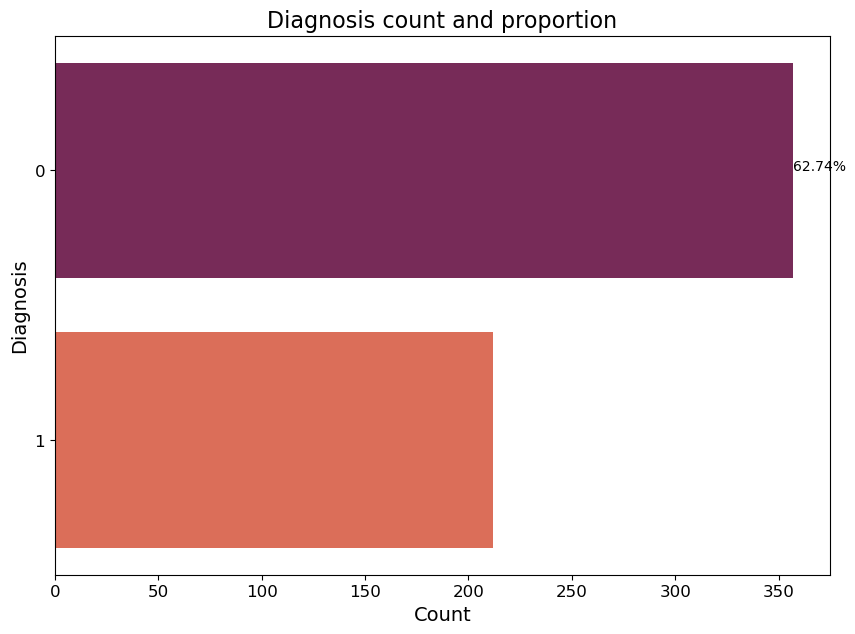

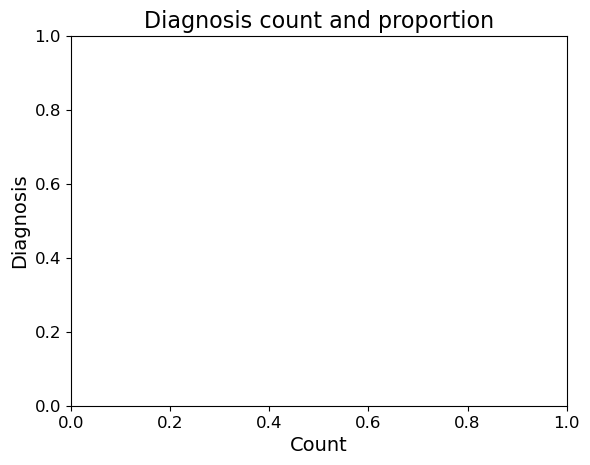

In [15]:
diagnosis_checker(data=cancer)

**Observations:**

- **Majority** of the patients have **benign** nucleus.

- There is no **need to oversample** since the class imbalance isn't very high.

- All of our **independent** **features** are **continuous** and the **target** variable is **categorical**.

- We can use this information to create functions that can plot distribution of any feature and also compare any two features.

---
**<h4>Question 4**: Create a function that plots a displot for any of the independent features concerning diagnosis.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `sns.displot()` with **x** parameter as any **feature name** and **hue** as **diagnosis** feature.

- Keep `aspect` of the displot as 3.

- Keep `kde=True`.

- Add additional cosmetics like `grid` and `title`.

- Set `fontsize` for ticks as 12, labels as 14 and title as 16.

- Use `plt.show()` to properly display the plot.

</details>



In [16]:
def make_displot(data=None, column=None):

    # Create a distplot with column name and keep hue as diagnosis
    sns.displot(x=column,
              hue='diagnosis',
              kde=True,
              data=data,
              palette='hls',
              aspect=3)

    # Add cosmetics
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.xlabel(xlabel=column, size=14)
    plt.ylabel(ylabel='Count', size=14)
    plt.title(label=('Diagnosis on basis of ' + column), size=16)

    # Display the output
    plt.show()

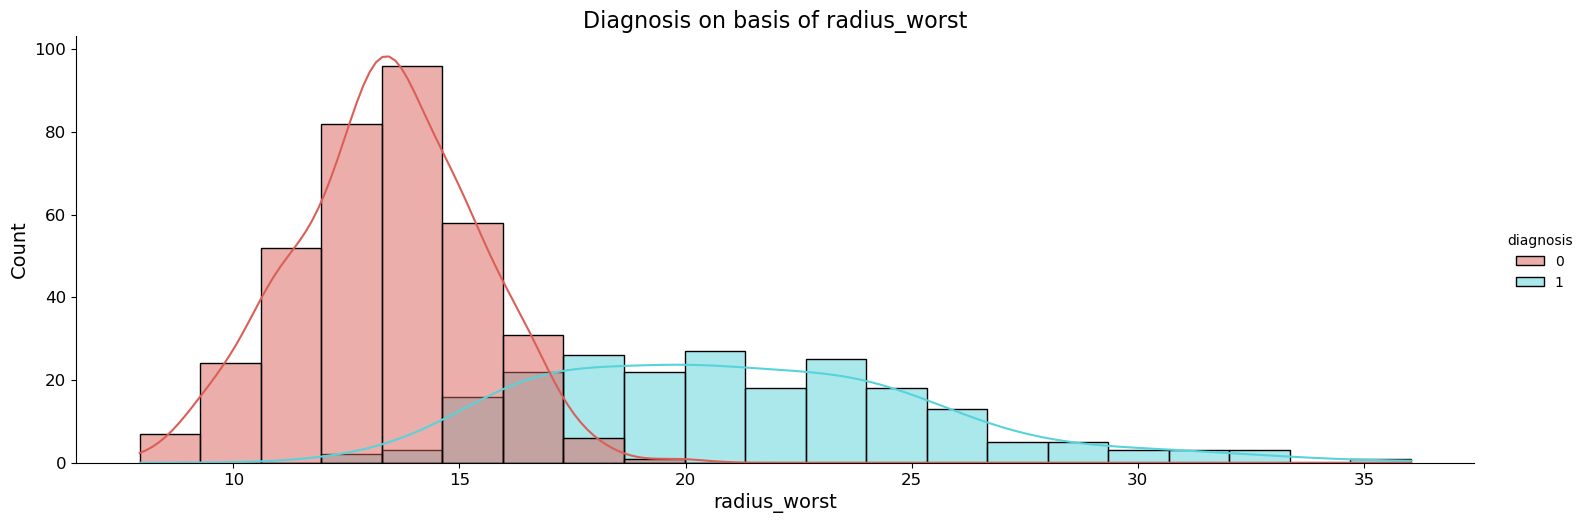

In [17]:
make_displot(data=cancer, column='radius_worst')

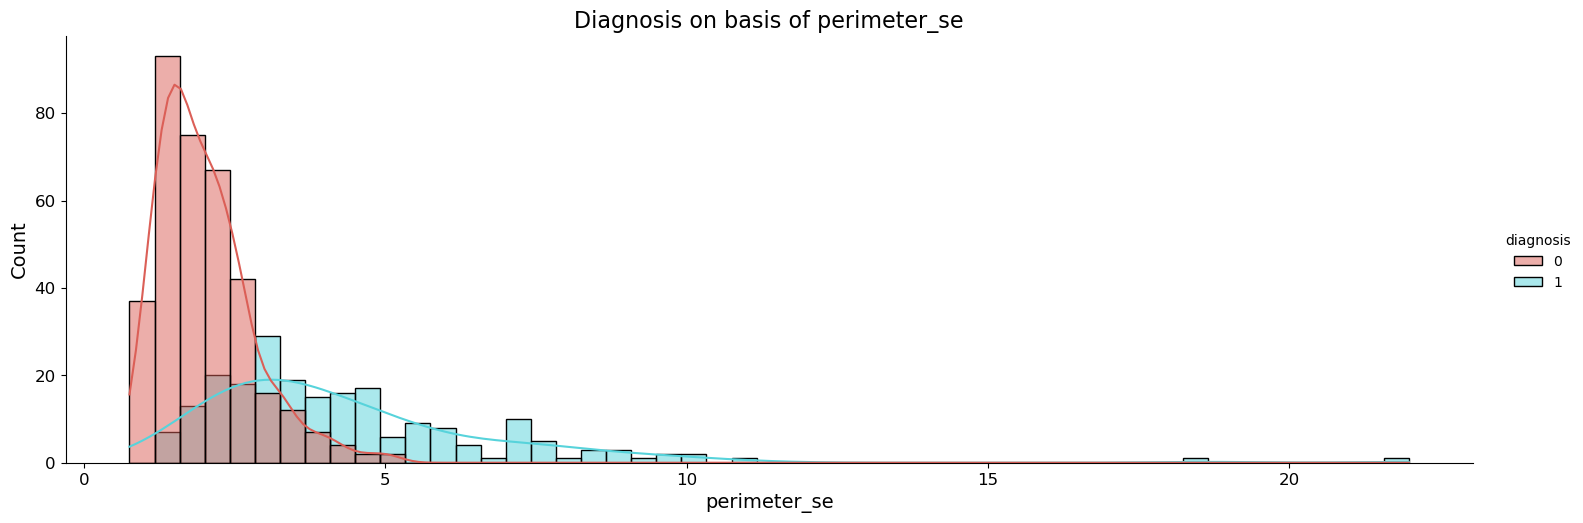

In [18]:
make_displot(data=cancer, column='perimeter_se')

---
**<h4>Question 5**: Create a function that plots a scatterplot between any two independent features concerning diagnosis feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 10x10 inches figure.

- Use `sns.scatterplot()` with **x** parameter as any **feature**, **y** parameter as any other **feature**, and **hue** as **diagnosis** feature.

- Add additional cosmetics like `grid` and `title`.

- Set `fontsize` for ticks as 12, labels as 14 and title as 16.

- Use `plt.show()` to properly display the plot.

</details>

In [19]:
def make_scatter(data=None, column_x=None, column_y=None):
    # Create a figure of size 10 x 10 inches
    fig = plt.figure(figsize=(10, 10))

    # Create a scatterplot with column names and keep hue as diagnosis
    sns.scatterplot(x=column_x,
                  y=column_y,
                  hue='diagnosis',
                  data=data,
                  palette='Dark2',
                  edgecolor='black')

    # Add cosmetics
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.xlabel(xlabel=column_x, size=14)
    plt.ylabel(ylabel=column_y, size=14)
    plt.title(label=(column_x + ' vs ' + column_y + ' with respect to diagnosis'), size=16)
    plt.legend(labels=['Malignant', 'Benign'])

    # Display the output
    plt.show()

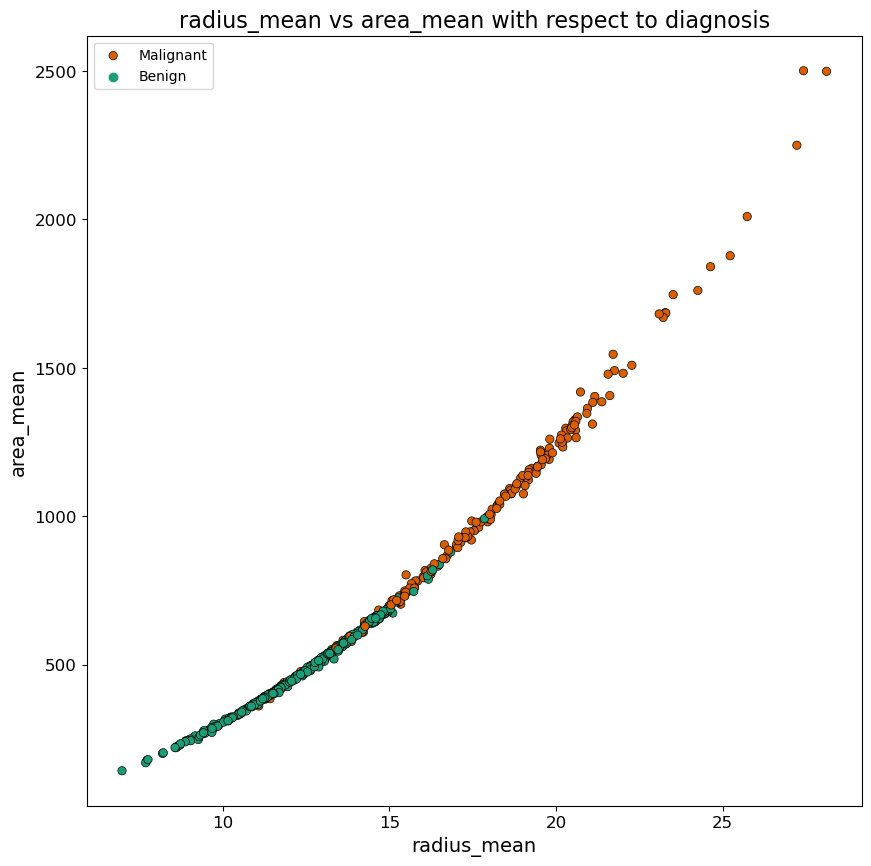

In [20]:
make_scatter(data=cancer, column_x='radius_mean', column_y='area_mean')

**Observations:**

- radius_mean and area_mean are **highly correlated** and thus we observe such a scatter plot.

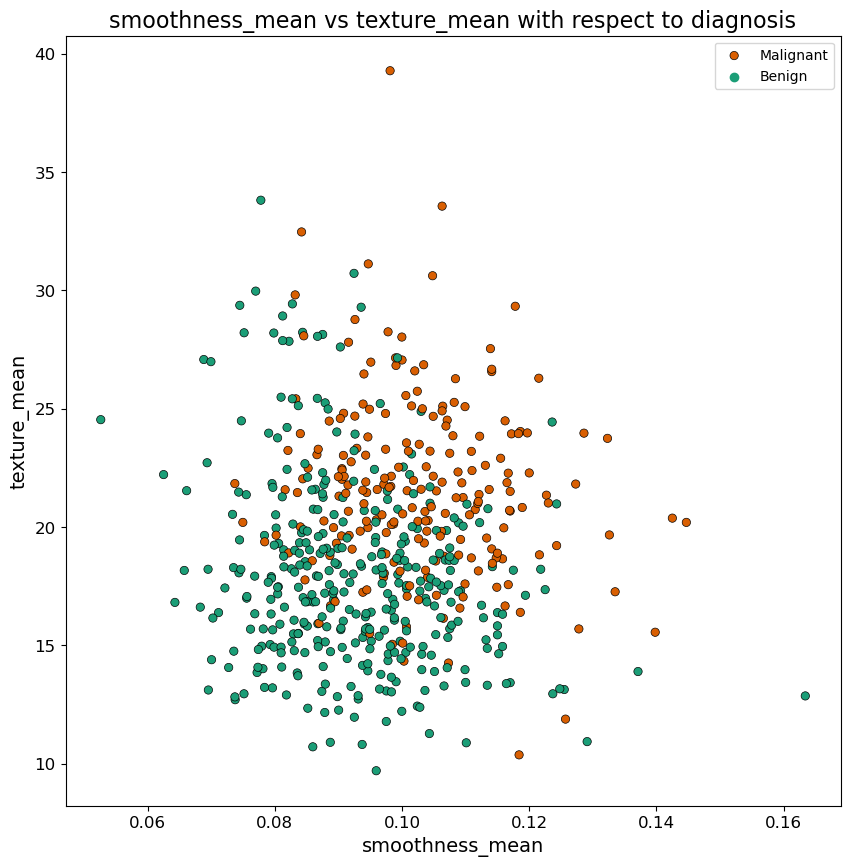

In [21]:
make_scatter(data=cancer, column_x='smoothness_mean', column_y='texture_mean')

**Observations:**

- smoothness_mean and texture_mean are **not correlated** to each other and thus we observe such a scatter plot.

- After checking some relations between the plethora of features, we can start with the model building phase.

<a name = Section7></a>

---
# **7. Data Post-Processing**
---

<a name = Section71></a>

### **7.1 Feature Scaling**

- In this section, we will perform standard scaling over the input features.

---
**<h4>Question 6**: Create a function that extracts the dependent and the independent variables into dataframes X and y.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create input dataframe X by dropping only "diagnosis" feature from axis 1.

- Create target series by using "diagnosis" as value.

</details>



In [22]:
def feature_extract(data=None):
    X = data.drop(labels=['diagnosis'], axis=1)
    y = data['diagnosis']
    return X, y

In [23]:
X, y = feature_extract(data=cancer)


---
**<h4>Question 7**: Create a function that uses StandardScaler on X dataframe.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a scaler object using StandardScaler().

- Fit and transform input features (X) using `.fit_transform(X)` method.

- Create a dataframe using the output from .fit_transform() along with the feature names of input dataframe (X).

</details>




In [24]:
def scale_data(X=None):
    sc = StandardScaler()
    scaled_data = sc.fit_transform(X)
    scaled_X = pd.DataFrame(data=scaled_data, columns=X.columns)
    return scaled_X

In [25]:
scaled_X = scale_data(X=X)
scaled_X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.23641,1.09706,-2.07334,1.26993,0.98437,1.56847,3.28351,2.65287,2.53248,2.21752,2.25575,2.48973,-0.56527,2.83303,2.48758,-0.21400,1.31686,0.72403,0.66082,1.14876,0.90708,1.88669,-1.35929,2.30360,2.00124,1.30769,2.61667,2.10953,2.29608,2.75062,1.93701
1,-0.23640,1.82982,-0.35363,1.68595,1.90871,-0.82696,-0.48707,-0.02385,0.54814,0.00139,-0.86865,0.49925,-0.87624,0.26333,0.74240,-0.60535,-0.69293,-0.44078,0.26016,-0.80545,-0.09944,1.80593,-0.36920,1.53513,1.89049,-0.37561,-0.43044,-0.14675,1.08708,-0.24389,0.28119
2,0.43174,1.57989,0.45619,1.56650,1.55888,0.94221,1.05293,1.36348,2.03723,0.93968,-0.39801,1.22868,-0.78008,0.85093,1.18134,-0.29701,0.81497,0.21308,1.42483,0.23704,0.29356,1.51187,-0.02397,1.34748,1.45628,0.52741,1.08293,0.85497,1.95500,1.15226,0.20139
3,0.43212,-0.76891,0.25373,-0.59269,-0.76446,3.28355,3.40291,1.91590,1.45171,2.86738,4.91092,0.32637,-0.11041,0.28659,-0.28838,0.68970,2.74428,0.81952,1.11501,4.73268,2.04751,-0.28146,0.13398,-0.24994,-0.55002,3.39427,3.89340,1.98959,2.17579,6.04604,4.93501
4,0.43220,1.75030,-1.15182,1.77657,1.82623,0.28037,0.53934,1.37101,1.42849,-0.00956,-0.56245,1.27054,-0.79024,1.27319,1.19036,1.48307,-0.04852,0.82847,1.14420,-0.36109,0.49933,1.29858,-1.46677,1.33854,1.22072,0.22056,-0.31339,0.61318,0.72926,-0.86835,-0.39710


<a name = Section72></a>

### **7.2 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

---
**<h4>Question 8**: Create a function that splits X and y into train and test dataset.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `.train_test_split()` method to split the dataset.

- Use `test_size` = **0.25** and `random_state` = **42**.

- **Stratify** the target variable.

</details>




In [26]:
def data_split(X=None, y=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

    print('Training Data Shape:', X_train.shape, y_train.shape)
    print('Testing Data Shape:', X_test.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

In [27]:
X_train, X_test, y_train, y_test = data_split(X=scaled_X, y=y)

Training Data Shape: (426, 31) (426,)
Testing Data Shape: (143, 31) (143,)


<a name = Section8></a>

---
# **8. Modelling Development & Evaluation**
---

<a name = Section81></a>

### **8.1 Modelling Development & Evaluation without PCA**

- In this section, we will develop some baseline models using the train and test set.

---
**<h4>Question 9**: Write a function to instantiate a RandomForestClassifier and a LogisticRegression using scikit learn.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `RandomForestClassifier()` to instantiate a random forest model.

- Use `LogisticRegression()` to instantiate a logistic regression model.

- Use `random_state` equal to **0** for both the models.

- Put both the models in a list and return the list.

</details>


In [28]:
def models_initialize():
    return [RandomForestClassifier(random_state=0), LogisticRegression(random_state=0)]

In [29]:
clfs = models_initialize()
clfs

[RandomForestClassifier(random_state=0), LogisticRegression(random_state=0)]

---
**<h4>Question 10**: Fit and evaluate the models and calculate the time taken by each classifier to fit.</h4>

---

<details>

**<summary>Hint:</summary>**

- `Fit` both the models on training set.

- `Predict` the values on the train set and the test set.

- Evaluate them using the `accuracy_score` on the train set and the test set.

</details>


In [30]:
import time

def train_n_eval(clfs=None, X_train=None, y_train=None, X_test=None, y_test=None):

    for clf in clfs:
        # Extracting model name
        model_name = type(clf).__name__
        
        # Calculate start time
        start_time = time.time()

        # Fit the model on train data
        clf.fit(X_train, y_train)

        # Make predictions using train data
        y_pred_train = clf.predict(X_train)

        # Calculate accuracy of the model
        clf_train_accuracy = accuracy_score(y_train, y_pred_train)

        # Make predictions using test data
        y_pred = clf.predict(X_test)

        # Calculate accuracy of the model
        clf_accuracy = accuracy_score(y_test, y_pred)
        
        # Calculate evaluated time
        elapsed_time = (time.time() - start_time)

        # Display the accuracy of the model
        print('----------------------------------------\n')
        print('Performance Metric of', model_name, ':')
        print('[Train Accuracy]:', clf_train_accuracy)
        print('[Test Accuracy]:', clf_accuracy)
        print('[Processing time]:', elapsed_time)
        print('----------------------------------------\n')

In [31]:
train_n_eval(clfs=clfs, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

----------------------------------------

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.9790209790209791
[Processing time]: 0.17597007751464844
----------------------------------------

----------------------------------------

Performance Metric of LogisticRegression :
[Train Accuracy]: 0.9882629107981221
[Test Accuracy]: 0.965034965034965
[Processing time]: 0.10927987098693848
----------------------------------------



**Observations:**

- Both the models **fit well** on the data.

<a name = Section82></a>

### **8.2 Dimensionality Reduction using PCA**

- In this section, we will reduce the train and test set using Principal Component Analysis.

---
**<h4>Question 11**: Create a function that applies PCA to fit X and plot the variation of 95% of explained variance with number of features.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate PCA using `PCA()`

- Use `random_state` = **0** and keep `n_components` = 0.95 in the PCA model.

- Fit the PCA model on X_train dataframe.

- Use `np.cumsum()` to calculate the **total variance** over the different number of principal components.

- Plot the **variance** against the **number of principal components**.

- Look at the plot and try to figure out the value of **number of principal components** explaining **95%** of variance.

</details>


In [32]:
def apply_pca():

    pca = PCA(n_components=0.95, random_state=0)
    pca.fit(X_train)

    # Calculate the variance %
    var = np.cumsum(a=np.round(a=pca.explained_variance_ratio_, decimals=3)*100)

    print(str(len(pca.explained_variance_ratio_))+' components explain '+str(var[-1])+'% variance of the data')

    # Create a 10 x 7 inches figure
    fig = plt.figure(figsize=(10, 7))

    # Plot the variance graph
    plt.plot(var)

    # Add some cosmetics
    plt.ylabel(ylabel='% Variance Explained', size=14)
    plt.xlabel(xlabel='Number of Features', size=14)
    plt.title(label='PCA Analysis', size=16)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.ylim(bottom=30, top=100.5)

    # Show the output
    plt.show()

11 components explain 95.39999999999999% variance of the data


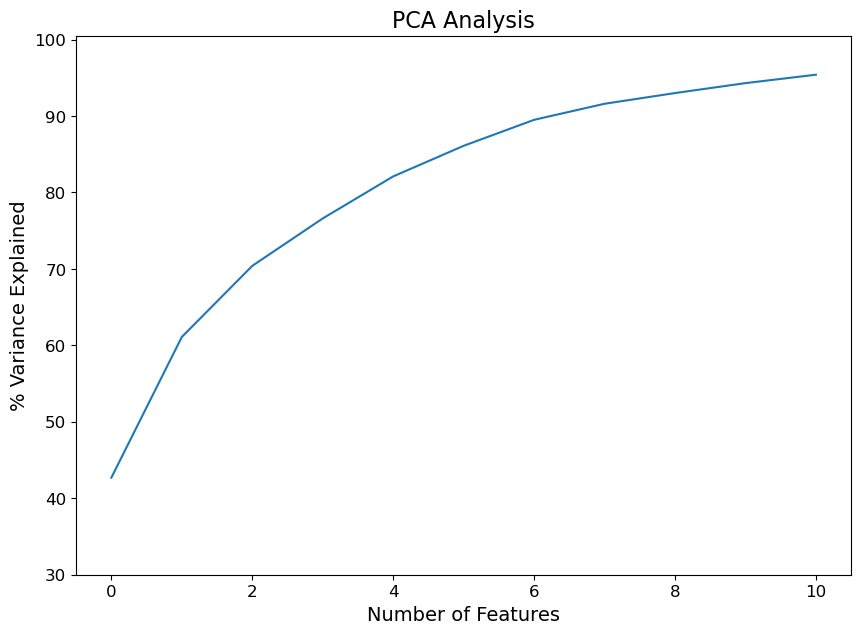

In [33]:
apply_pca()

**Observations:**

- **95% variance** can be **achieved** with only **11 principal components**.

- We will run PCA again on **X_train** and **X_test** with **11 components** and build our model based on that data.

---
**<h4>Question 12**: Create a functioin to apply PCA on X with number of principal components = 11.</h4>

---

<details>

**<summary>Hint:</summary>**

- Keep `n_components` as value that explain **95% variance of data** (say 11).

- Use `random_state` as **0** in the PCA model.

- Fit and transform X_train using `.fit_transform()`.

- Transform X_test using `.transform()`.

</details>



In [34]:
def generate_pca(X_train=None, X_test=None):
    pca = PCA(n_components=11, random_state=0)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    print('Shape of train set after PCA reduction:', X_train.shape)
    print('Shape of test set after PCA reduction:', X_test.shape)
    return X_train, X_test

In [35]:
X_train_pca, X_test_pca = generate_pca(X_train=X_train, X_test=X_test)

Shape of train set after PCA reduction: (426, 11)
Shape of test set after PCA reduction: (143, 11)


<a name = Section83></a>

### **8.3 Modelling Development & Evaluation after PCA**

- In this section, we will develop new models using the PCA reduced train and test set.

---
**<h4>Question 13**: Use the previously generated functions to split the train-test data, train the model, make predictions on test-set and evaluate the model.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use the previously generated functions - `models_initialize()` and `train_n_eval()` for model generation, training and evaluation on the reduced data.

</details>



In [36]:
train_n_eval(clfs=models_initialize(), X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

----------------------------------------

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.951048951048951
[Processing time]: 0.15411806106567383
----------------------------------------

----------------------------------------

Performance Metric of LogisticRegression :
[Train Accuracy]: 0.9882629107981221
[Test Accuracy]: 0.972027972027972
[Processing time]: 0.003668069839477539
----------------------------------------



**Observations:**

- We can see that the newly trained models have scored **similar accuracies**.

- These models seem to be **fitted well** on the **reduced data**.

- We observe a **comparable accuracy** even **after reducing** the features.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We can use the above two models to check their **performance** on some **undisclosed records**.

- This will help us to get a **general idea** of their **real-time accuracy**.

- The **achieved performance** then can be used to **compare** and **finalize** our model for breast cancer detection.